# Downloading the Datasets

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# downlaoding the datsets
# here we are using RAVDESS AND TESS datasets

!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
!unzip -q ravdess-emotional-speech-audio.zip

!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
!unzip -q toronto-emotional-speech-set-tess.zip

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 94% 405M/429M [00:00<00:00, 327MB/s]
100% 429M/429M [00:01<00:00, 405MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 415M/428M [00:01<00:00, 258MB/s]
100% 428M/428M [00:01<00:00, 325MB/s]


**We will be using two folders for our data**

**"TESS Toronto emotional speech set data" -> TESS dataset**

**"audio_speech_actors_01-24" -> RAVDESS dataset**

# Processing and organizing the files of the dataset

In [ ]:
# first downloading the modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# extracting the path and label of the tess dataset
base_tess_path = "/content/TESS Toronto emotional speech set data"
tess_path = []
tess_labels = []

for folder in os.listdir(base_tess_path):
    folder_path = os.path.join(base_tess_path, folder)

    if os.path.isdir(folder_path):
        # Extract the emotion label from folder name
        emotion_label = folder.split('_')[-1].lower()

        for file in os.listdir(folder_path):
            if file.endswith(".wav"):
                tess_path.append(os.path.join(folder_path, file))
                tess_labels.append(emotion_label)

In [ ]:
print(tess_path[:5])
print(tess_labels[:5])

['/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_neat_ps.wav', '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_sour_ps.wav', '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_chain_ps.wav', '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_ripe_ps.wav', '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_long_ps.wav']
['surprise', 'surprise', 'surprise', 'surprise', 'surprise']


In [ ]:
np.unique(tess_labels)

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise',
       'surprised'], dtype='<U9')

In [ ]:
# we can see that there are some inconsistent mappings where surprise and surprised both are used to refer to the same emotion
# thus mapping surprised to surprise
# Normalize label 'surprised' to 'surprise'
tess_labels = ['surprise' if lbl == 'surprised' else lbl for lbl in tess_labels]

In [ ]:
np.unique(tess_labels)

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype='<U8')

In [ ]:
# now doing the same for ravdess dataset
import glob
base_ravdess_path = '/content/audio_speech_actors_01-24'
ravdess_path = []
ravdess_labels = []

# referred to the documentation of the dataset to understand the file naming convention and using that to decode the file names and process them
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fear',
    '07': 'disgust',
    '08': 'surprise'
}

files = glob.glob(os.path.join(base_ravdess_path, "Actor_*", "*.wav"))

for file in files:
    filename = os.path.basename(file)
    parts = filename.split('.')[0].split('-')
    emotion_code = parts[2]  # 3rd part is emotion
    emotion_label = emotion_map.get(emotion_code)
    if emotion_label:  # Only include known emotions
        ravdess_path.append(file)
        ravdess_labels.append(emotion_label)

In [ ]:
ravdess_path[:5]

['/content/audio_speech_actors_01-24/Actor_15/03-01-03-02-02-02-15.wav',
 '/content/audio_speech_actors_01-24/Actor_15/03-01-08-01-02-01-15.wav',
 '/content/audio_speech_actors_01-24/Actor_15/03-01-04-01-02-01-15.wav',
 '/content/audio_speech_actors_01-24/Actor_15/03-01-06-02-01-01-15.wav',
 '/content/audio_speech_actors_01-24/Actor_15/03-01-03-02-01-01-15.wav']

In [ ]:
np.unique(ravdess_labels)

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise'], dtype='<U8')

In [ ]:
# checking the length of each to ensure correctness
print("TESS labels:", len(tess_labels))
print("TESS paths:", len(tess_path))
print("RAVDESS labels:", len(ravdess_labels))
print("RAVDESS paths:", len(ravdess_path))

TESS labels: 2800
TESS paths: 2800
RAVDESS labels: 1440
RAVDESS paths: 1440


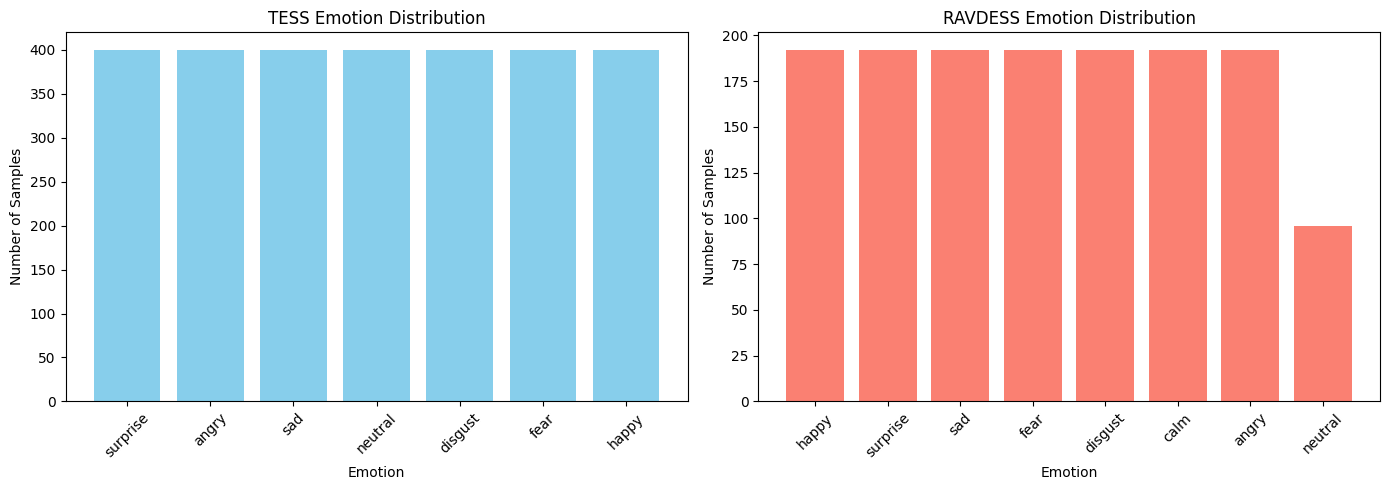

In [ ]:
# checking the distribution of each emotion in each dataset
from collections import Counter
tess_counts = Counter(tess_labels)
ravdess_counts = Counter(ravdess_labels)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# tess
axs[0].bar(tess_counts.keys(), tess_counts.values(), color='skyblue')
axs[0].set_title('TESS Emotion Distribution')
axs[0].set_xlabel('Emotion')
axs[0].set_ylabel('Number of Samples')
axs[0].tick_params(axis='x', rotation=45)

# ravdess
axs[1].bar(ravdess_counts.keys(), ravdess_counts.values(), color='salmon')
axs[1].set_title('RAVDESS Emotion Distribution')
axs[1].set_xlabel('Emotion')
axs[1].set_ylabel('Number of Samples')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# we can see that the number of audio files in tess is almost double to ravdess and moreover calm [absent in tess] and neutral are
# acoustically simiilar so we can simply merge them into one single neutral category
tess_labels = ['neutral' if lbl in ['calm', 'neutral'] else lbl for lbl in tess_labels]
ravdess_labels = ['neutral' if lbl in ['calm', 'neutral'] else lbl for lbl in ravdess_labels]

In [ ]:
# Note: since we are merging tess and ravdess datasets there is a majority of female audio as compared to male.
# this can cause a bias in the model due to differences in male and female vocal imagery
# however since the primary focus of this project is developing a pipeline for pre-preprocessing the data and using them
# we can ignore this bias as the dataset will be replaced with the gujrati dataset later anyways.

In [ ]:
# continuing with merging the two datasets
paths = tess_path + ravdess_path
labels = tess_labels + ravdess_labels

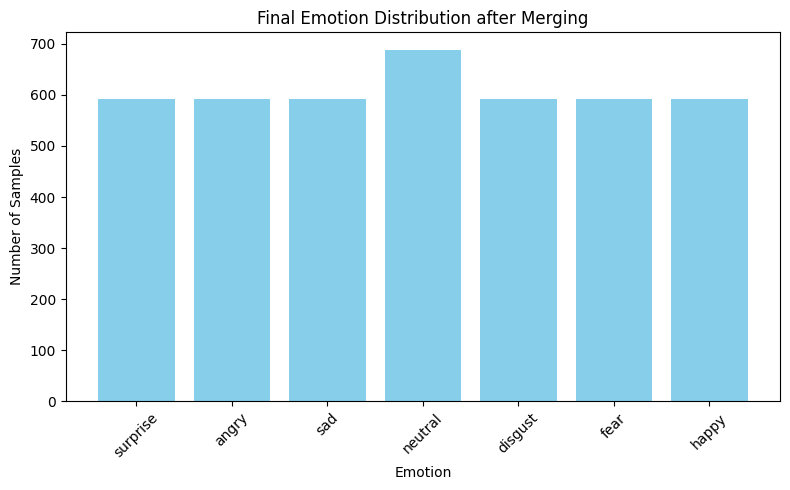

In [ ]:
emotion_counts = Counter(labels)

plt.figure(figsize=(8, 5))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.title("Final Emotion Distribution after Merging")
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# creating a dataframe
data = pd.DataFrame({
    'path':paths,
    'label':labels
})
data

,path,label
0,/content/TESS Toronto emotional speech set dat...,surprise
1,/content/TESS Toronto emotional speech set dat...,surprise
2,/content/TESS Toronto emotional speech set dat...,surprise
3,/content/TESS Toronto emotional speech set dat...,surprise
4,/content/TESS Toronto emotional speech set dat...,surprise
...,...,...
4235,/content/audio_speech_actors_01-24/Actor_13/03...,fear
4236,/content/audio_speech_actors_01-24/Actor_13/03...,happy
4237,/content/audio_speech_actors_01-24/Actor_13/03...,neutral
4238,/content/audio_speech_actors_01-24/Actor_13/03...,neutral


In [ ]:
data['label'].value_counts()

,count
label,
neutral,688
angry,592
surprise,592
sad,592
disgust,592
fear,592
happy,592


In [ ]:
# since these is a pretty balanced dataset we can start with data exploration and analysis

# Data Exploration and Analysis

In [ ]:
# creating two functions for waveplot and spectogram

def create_waveplot(file_path, emotion):
    data, sr = librosa.load(file_path, sr=22050, mono=True)
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with "{emotion}" emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

def create_spectrogram(file_path, emotion):
    data, sr = librosa.load(file_path, sr=22050, mono=True)
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(np.abs(X))
    plt.figure(figsize=(12, 3))
    plt.title(f'Spectrogram for audio with "{emotion}" emotion', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()


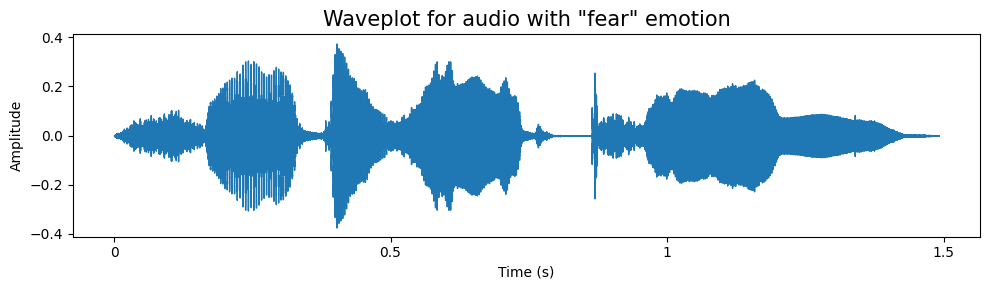

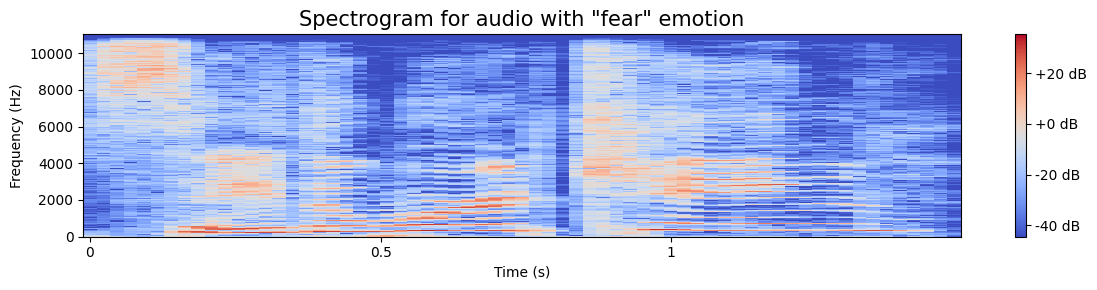

In [ ]:
# now one more thing is that the files of the two datasets are not at the same sampling rate
# and mono-stereo setting so we need to convert all to 22050Hz and mono before using them

# let us plot for a fear emotion
emotion = 'fear'
plot_path = data[data['label'] == emotion]['path'].iloc[0]
create_waveplot(plot_path, emotion)
print()
create_spectrogram(plot_path, emotion)
print()
Audio(plot_path)

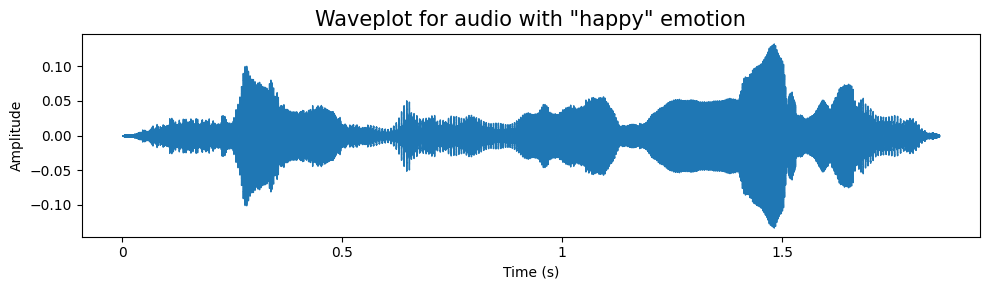

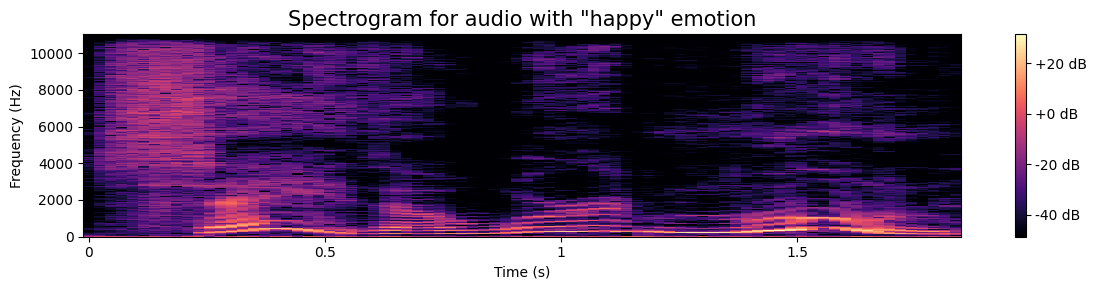

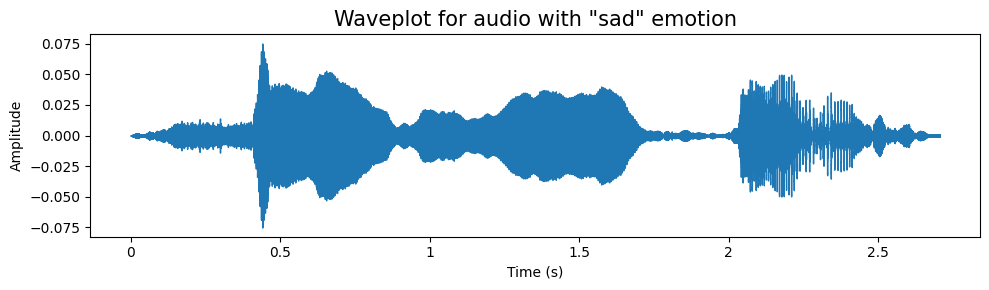

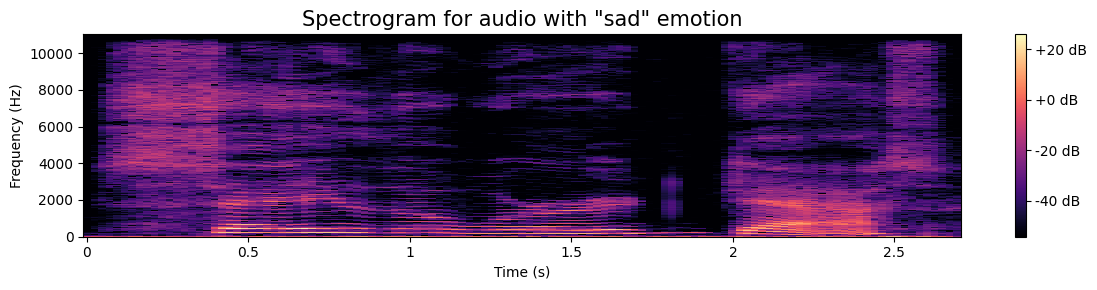

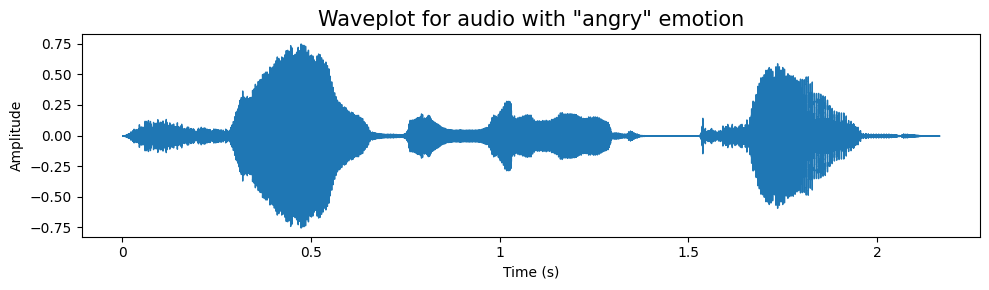

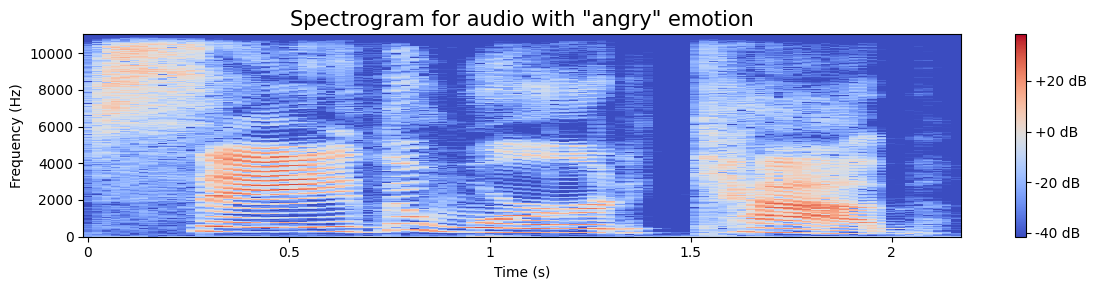

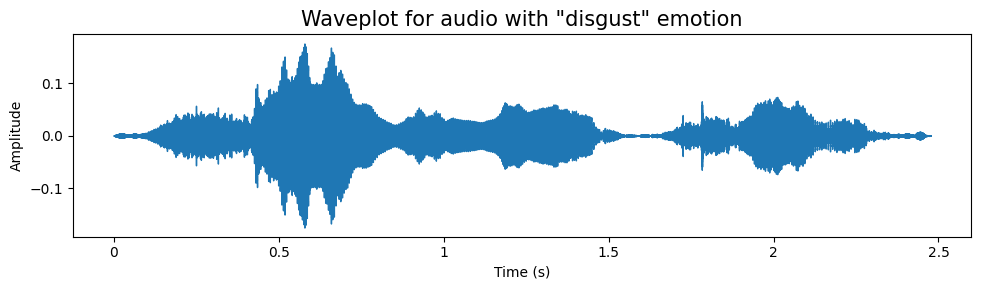

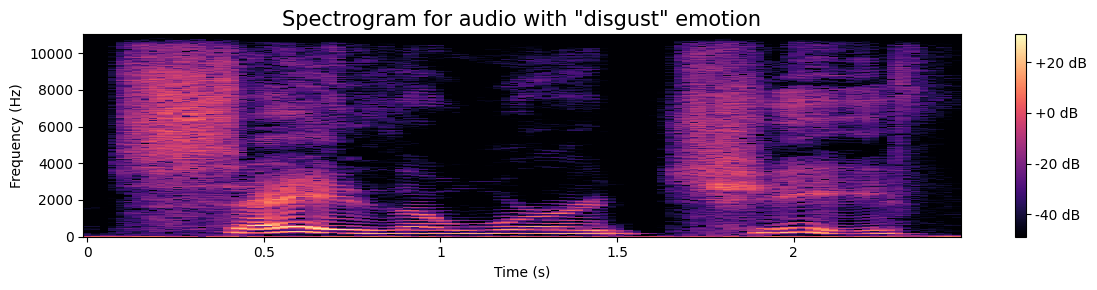

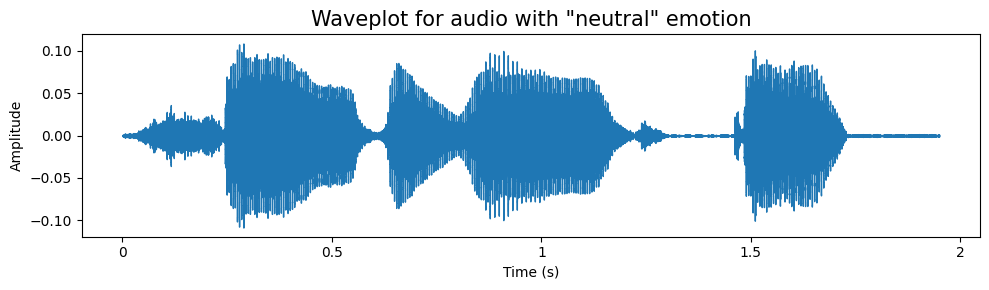

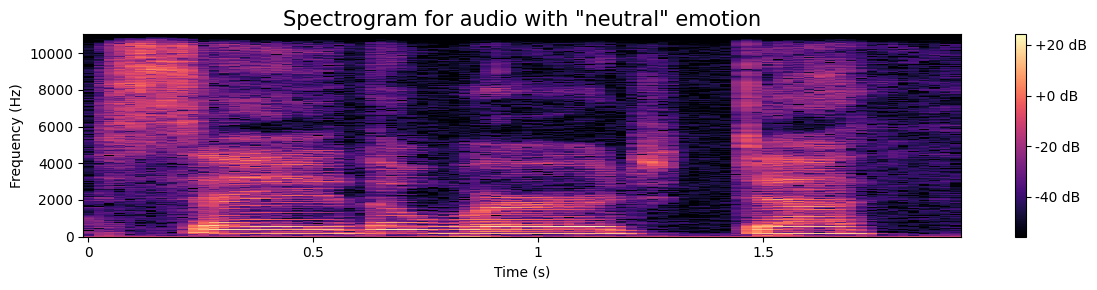

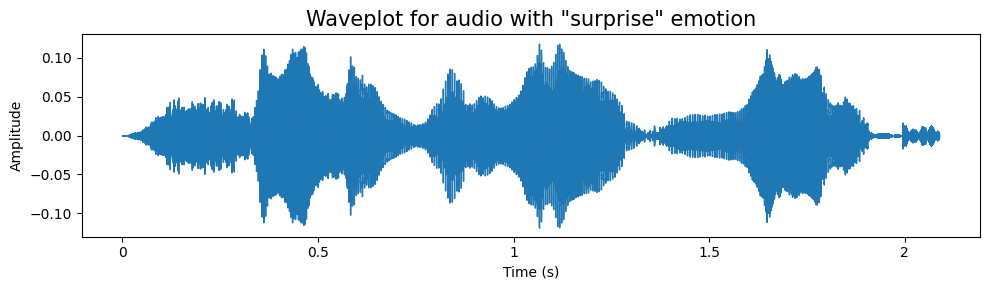

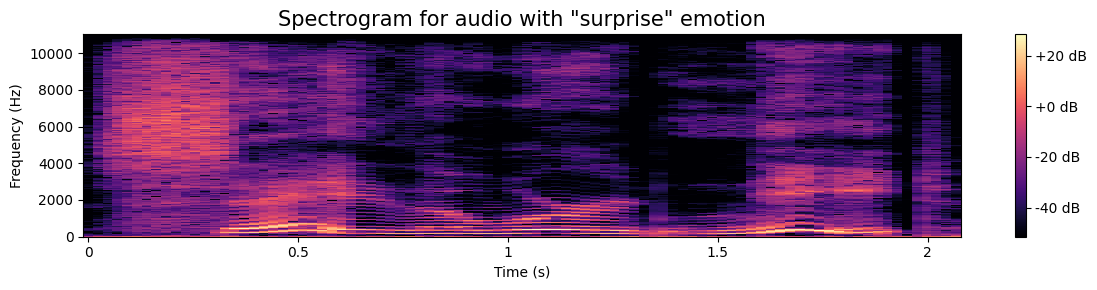

In [ ]:
# similarly im plotting for all other emotions
emotions = ['happy', 'sad', 'angry', 'disgust', 'neutral', 'surprise']
for emo in emotions:
  plot_path = data[data['label'] == emo]['path'].iloc[0]
  create_waveplot(plot_path, emo)
  print()
  create_spectrogram(plot_path, emo)
  print()
  display(Audio(plot_path))
  print()
  print()

# Data Augmentation

In [ ]:
# since the real world data will not be perfect its better to augment our data
# im adding noise, stretch, shift and pitch augmentation

import random

def add_noise(data, noise_factor=0.005):
    noise = np.random.randn(len(data))
    augmented = data + noise_factor * noise
    return augmented.astype(type(data[0]))

def time_stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def pitch_shift(data, sampling_rate, n_steps=4):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

def shift(data, shift_max=0.2):
    shift = int(len(data) * shift_max)
    shift = random.randint(-shift, shift)
    augmented = np.roll(data, shift)
    return augmented

In [ ]:
def plot_waveform(data, sr, title):
    plt.figure(figsize=(10, 2))
    librosa.display.waveshow(data, sr=sr)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def show_augmentations_with_audio(file_path):
    data, sr = librosa.load(file_path, sr=None, mono=True)

    print("Original Audio")
    plot_waveform(data, sr, 'Original')
    print()
    display(Audio(data, rate=sr))
    print()

    print("\nNoised Audio")
    noise_data = add_noise(data)
    plot_waveform(noise_data, sr, 'Noised')
    print()
    display(Audio(noise_data, rate=sr))
    print()

    print("\nTime-Stretched Audio (slower)")
    stretch_data = time_stretch(data, rate=0.8)
    plot_waveform(stretch_data, sr, 'Time-Stretched')
    print()
    display(Audio(stretch_data, rate=sr))
    print()

    print("\nPitch-Shifted Audio (+4 semitones)")
    pitch_data = pitch_shift(data, sr, n_steps=4)
    plot_waveform(pitch_data, sr, 'Pitch-Shifted')
    print()
    display(Audio(pitch_data, rate=sr))
    print()

    print("\nShifted Audio")
    shift_data = shift(data)
    plot_waveform(shift_data, sr, 'Shifted')
    print()
    display(Audio(shift_data, rate=sr))
    print()


Original Audio


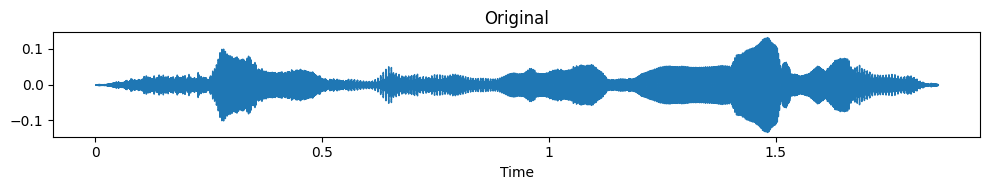



Noised Audio


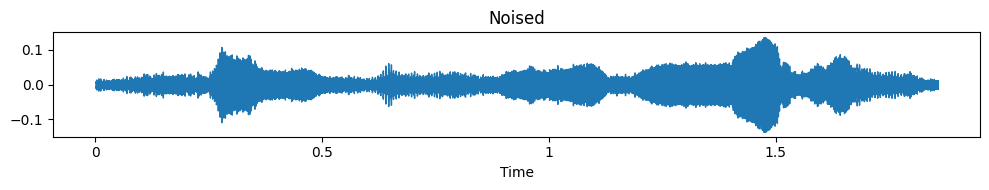



Time-Stretched Audio (slower)


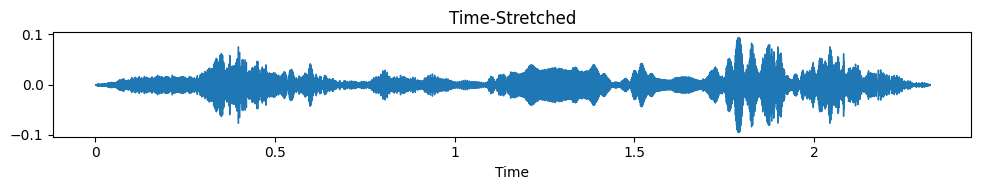



Pitch-Shifted Audio (+4 semitones)


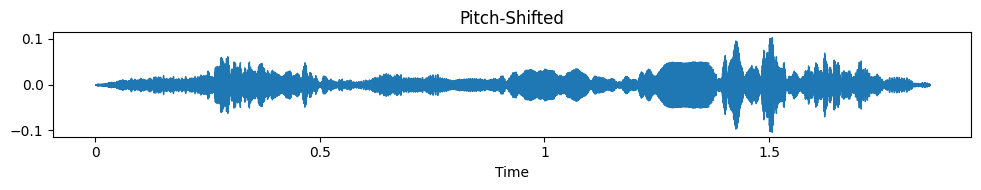



Shifted Audio


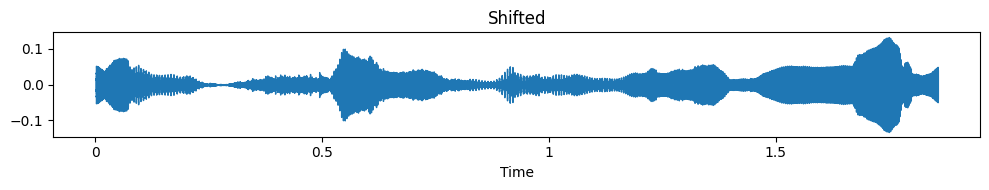

In [ ]:
sample_path = data[data['label'] == 'happy']['path'].iloc[0]
show_augmentations_with_audio(sample_path)

In [ ]:
# now we will generate some augmented data and store it and append these newly created data to the dataset

import soundfile as sf
from tqdm import tqdm

aug_folder = 'augmented_audio'
os.makedirs(aug_folder, exist_ok=True)

new_data = []

samples_to_augment = data.sample(n=350, random_state=42)
print("Augmenting audio data...")

for idx, row in tqdm(samples_to_augment.iterrows(), total=len(samples_to_augment)):
    file_path = row['path']
    label = row['label']

    try:
        data_audio, sr = librosa.load(file_path, sr=None)

        # Augmentations
        augmentations = {
            'noise': add_noise(data_audio),
            'stretch': time_stretch(data_audio, rate=0.8),
            'pitch': pitch_shift(data_audio, sr, n_steps=4),
            'shift': shift(data_audio)
        }

        for aug_type, aug_data in augmentations.items():
            filename = os.path.basename(file_path).replace('.wav', f'_{aug_type}.wav')
            new_path = os.path.join(aug_folder, filename)
            sf.write(new_path, aug_data, sr)
            new_data.append({'path': new_path, 'label': label})

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Append new data to original DataFrame
augmented_df = pd.DataFrame(new_data)
data = pd.concat([data, augmented_df], ignore_index=True)

print(f"Augmentation completed. Total samples now: {len(data)}")


Augmenting audio data...


100%|██████████| 350/350 [00:50<00:00,  6.94it/s]

Augmentation completed. Total samples now: 6040


In [ ]:
len(data)

6040

In [ ]:
# checking the labels again
data['label'].value_counts()

,count
label,
neutral,992
fear,872
surprise,872
angry,852
disgust,840
sad,828
happy,784


In [ ]:
# we can see that random augmentaion has introduced some amount of bias so i am continuing with feature extraction and training right now and will come back to this
# if and when required if the model doesnt perform well


# Feature Extraction

In [ ]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs_mean = np.mean(mfccs.T, axis=0)

    # Chroma
    stft = np.abs(librosa.stft(y))
    chroma = librosa.feature.chroma_stft(S=stft, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)

    # Mel Spectrogram
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_mean = np.mean(mel.T, axis=0)

    # Spectral Contrast
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sr)
    contrast_mean = np.mean(contrast.T, axis=0)

    # Root Mean Square Energy (RMSE)
    rmse = librosa.feature.rms(y=y)
    rmse_mean = np.mean(rmse.T, axis=0)

    # Concatenate all features
    features = np.hstack((mfccs_mean, chroma_mean, mel_mean, contrast_mean, rmse_mean))
    return features


def build_feature_df(df):
    features = []
    labels = []

    for idx, row in tqdm(df.iterrows(), total=len(df)):
        path = row['path']
        label = row['label']
        feature = extract_features(path)
        if feature is not None:
            features.append(feature)
            labels.append(label)

    feature_df = pd.DataFrame(features)
    feature_df['label'] = labels
    return feature_df


In [ ]:
features_df = build_feature_df(data)

100%|██████████| 6040/6040 [05:53<00:00, 17.07it/s]


In [ ]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,label
0,-429.803192,73.564758,26.640085,10.982797,10.580133,-3.021908,-10.644571,2.928987,-14.964899,-12.769687,-12.816107,-14.120928,-4.861801,-1.028931,-0.719469,-0.520839,-6.477322,0.934852,5.551980,0.268168,1.487250,3.327839,1.182838,-1.015917,0.501422,2.454444,-0.126856,-2.332785,3.751394,-2.194946,3.984758,-0.852980,-1.462680,1.067736,-0.094953,4.983155,9.530623,10.350563,13.109036,13.174038,...,0.003973,0.003328,0.006463,0.007009,0.006076,0.006913,0.006748,0.008168,0.005574,0.004863,0.003572,0.004552,0.003346,0.002114,0.001209,0.001409,0.001201,0.000845,0.000716,0.000662,0.000788,0.000619,0.000518,0.000391,0.000304,0.000283,0.000337,0.000519,0.000564,0.000752,0.001310,24.902750,21.363951,23.212035,20.703411,19.971706,19.978190,17.724110,0.023213,surprise
1,-400.586121,74.512756,19.772072,-19.283024,-9.338302,7.323426,-11.198608,-3.025881,-14.980450,-4.003673,-8.151651,-10.386617,-2.811706,1.160098,-3.758892,2.873154,-1.860481,2.768800,7.600740,-1.904825,-2.066382,3.823720,-3.405550,1.645564,4.700975,-3.006348,1.927026,-0.434120,3.732123,-0.477305,5.146324,-0.917577,2.302570,2.947967,2.997091,7.219131,8.068501,10.281525,13.322733,11.656244,...,0.002282,0.002852,0.003411,0.002939,0.003180,0.003524,0.003327,0.004614,0.004215,0.004500,0.003806,0.003592,0.003849,0.002637,0.002171,0.001794,0.001521,0.002044,0.002226,0.002143,0.001762,0.001815,0.001394,0.001199,0.000952,0.000572,0.000388,0.000364,0.000629,0.001120,0.001422,24.161440,19.653782,20.865165,20.467764,20.109577,18.884263,17.778455,0.018850,surprise
2,-441.008698,72.373726,13.416906,2.436631,9.323340,-3.705162,-10.337962,2.166991,-11.994349,-9.197505,-11.363866,-11.820502,-4.446448,-2.277051,-6.259044,4.299354,-3.723737,6.374383,6.883174,1.503066,3.736689,5.189598,-1.891156,1.036546,2.915882,-1.378414,3.959546,-1.913314,4.188075,-0.021512,4.861780,1.329271,2.593108,5.924882,4.665651,8.257230,8.180249,8.811693,11.180574,11.619939,...,0.001083,0.000846,0.001901,0.001860,0.001654,0.001562,0.001527,0.001556,0.001294,0.000946,0.000633,0.000434,0.000412,0.000520,0.000459,0.000349,0.000398,0.000429,0.000631,0.000986,0.001071,0.001104,0.000822,0.000701,0.000548,0.000430,0.000341,0.000335,0.000371,0.000328,0.000320,24.879894,20.874290,21.931478,19.160728,18.811265,18.538370,16.987395,0.016027,surprise
3,-438.917694,84.641685,24.671278,-16.897787,3.600261,1.286860,-5.618533,4.234182,-19.752001,-4.471684,-11.342326,-7.206457,-4.630098,-1.134273,-1.591000,5.366547,-3.090245,5.993531,5.976448,1.132493,-4.531469,1.193489,-2.883241,0.944259,2.806858,2.110699,1.835623,-1.424571,5.000997,-0.888950,3.618546,-2.355226,1.400285,-0.849261,-0.958024,1.217089,5.555388,11.025128,14.085337,14.968133,...,0.000808,0.000917,0.001584,0.002034,0.002683,0.003167,0.003921,0.003871,0.003062,0.003729,0.004419,0.004368,0.004240,0.002425,0.001369,0.000747,0.000517,0.000623,0.000560,0.000433,0.000456,0.000448,0.000577,0.000607,0.000585,0.000547,0.000363,0.000297,0.000316,0.000433,0.000530,25.913207,22.188507,23.016634,21.360399,19.862155,18.691115,18.454107,0.020237,surprise
4,-406.602356,95.201294,19.513300,-7.024882,-14.598936,-2.377642,-11.976745,2.663598,-12.918628,-7.843274,-9.799669,-11.889874,-5.928789,-1.066617,-3.896376,-0.974913,-1.646485,2.143915,9.136782,-1.205069,-1.416496,2.603656,-4.231122,-0.345547,2.768974,-2.445656,2.433859,0.805034,3.481529,-0.214887,4.082929,-1.948504,0.877336,1.627607,4.246498,7.985486,10.578984,13.715814,13.572248,14.205237,...,0.002065,0.002494,0.004077,0.003795,0.003275,0.003443,0.003215,0.002779,0.002297,0.001578,0.001995,0.002662,0.002955,0.002180,0.001733,0.000971,0.000820,0.000716,0.000638,0.000564,0.000389,0.000313,0.000225,0.000214,0.000231,0.000254,0.000250,0.000234,0.000249,0.000370,0.0005

In [ ]:
features_df.shape

(6040, 189)

# Data Preparation

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


le = LabelEncoder()
features_df['label'] = le.fit_transform(features_df['label'])

X = features_df.drop("label", axis=1)
y = features_df["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(6040, 188)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Model Evaluation
Starting from simple basic models and going all the way up

# Random Forest, SVM and XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# 2. SVM
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

# 3. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


Random Forest Accuracy: 0.8559602649006622
Random Forest Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       170
           1       0.80      0.88      0.84       168
           2       0.89      0.86      0.87       174
           3       0.92      0.83      0.87       157
           4       0.78      0.96      0.86       199
           5       0.88      0.77      0.82       166
           6       0.89      0.82      0.85       174

    accuracy                           0.86      1208
   macro avg       0.86      0.85      0.86      1208
weighted avg       0.86      0.86      0.86      1208

SVM Accuracy: 0.8567880794701986
SVM Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       170
           1       0.83      0.86      0.84       168
           2       0.88      0.87      0.88       174
           3       0.86      0.83      0.84       157
           4       0

# Simple Neural Network (MLP/ FeedForward)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# defining x_val from the x_train data
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4552 - loss: 1.4682 - val_accuracy: 0.7384 - val_loss: 0.7249
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7199 - loss: 0.7662 - val_accuracy: 0.7746 - val_loss: 0.6230
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7796 - loss: 0.6149 - val_accuracy: 0.8066 - val_loss: 0.5631
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7743 - loss: 0.6050 - val_accuracy: 0.8066 - val_loss: 0.5592
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7993 - loss: 0.5386 - val_accuracy: 0.8139 - val_loss: 0.5352
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8106 - loss: 0.5246 - val_accuracy: 0.8314 - val_loss: 0.4893
Epoch 7/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8269 - loss: 0.4792 - val_accuracy: 0.8252 - val_loss: 0.4779
Epoch 8/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8275 - loss: 0.4593 - val_acc

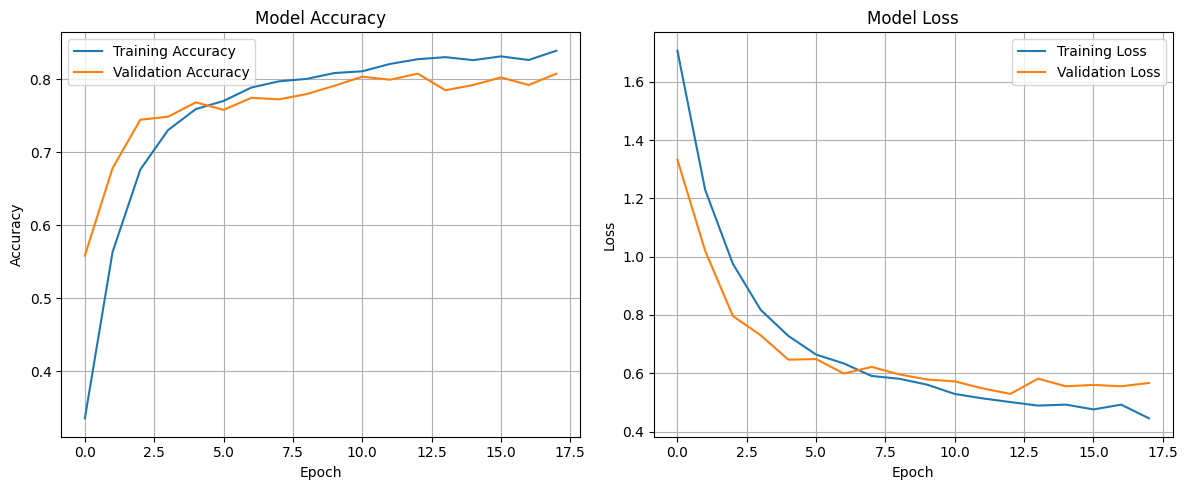

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step
              precision    recall  f1-score   support

       angry       0.78      0.83      0.80       170
     disgust       0.78      0.81      0.80       168
        fear       0.74      0.80      0.77       174
       happy       0.76      0.74      0.75       157
     neutral       0.76      0.93      0.84       199
         sad       0.89      0.70      0.78       166
    surprise       0.88      0.72      0.79       174

    accuracy                           0.79      1208
   macro avg       0.80      0.79      0.79      1208
weighted avg       0.80      0.79      0.79      1208



In [124]:
# plotting the accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test, y_pred, target_names=np.unique(data['label'])))

# LSTM

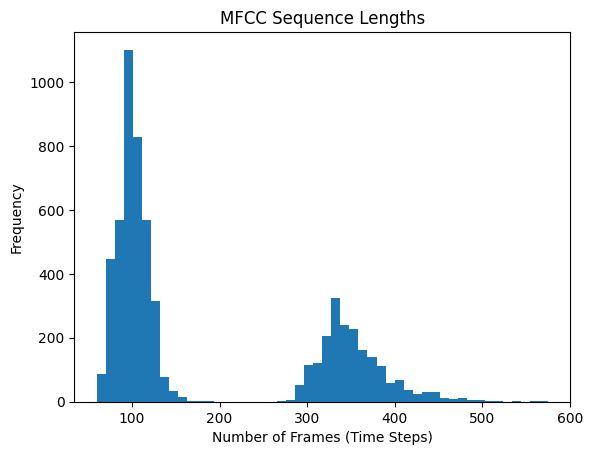

Max length: 575
95th percentile length: 388.0
Median length: 111.0


In [ ]:
# finding the maxlenght
mfcc_lengths = []

for path in data['path']:
    y, sr = librosa.load(path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_lengths.append(mfcc.shape[1])  # Number of time steps (frames)

# Plot the distribution of lengths
plt.hist(mfcc_lengths, bins=50)
plt.title("MFCC Sequence Lengths")
plt.xlabel("Number of Frames (Time Steps)")
plt.ylabel("Frequency")
plt.show()

# Print useful statistics
print(f"Max length: {max(mfcc_lengths)}")
print(f"95th percentile length: {np.percentile(mfcc_lengths, 95)}")
print(f"Median length: {np.median(mfcc_lengths)}")


In [ ]:
# now extracting sequential mfcc for lstm

MAX_LEN = 388

def extract_mfcc_sequence(file_path, max_len=MAX_LEN, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).T

    # Pad or truncate to fixed length
    if len(mfccs) < max_len:
        pad_width = max_len - len(mfccs)
        mfccs = np.pad(mfccs, ((0, pad_width), (0, 0)), mode='constant')
    else:
        mfccs = mfccs[:max_len]

    return mfccs

X = np.array([extract_mfcc_sequence(path) for path in data['path']])
y = data['label'].values

In [132]:
X.shape

(6040, 388, 40)

In [133]:
y.shape

(6040,)

In [134]:
y = le.fit_transform(data['label'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from tensorflow.keras.layers import Masking

model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(123, return_sequences=False, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 388, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 123)            │        80,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,935 (355.21 KB)

 Trainable params: 90,935 (355.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 106s 834ms/step - accuracy: 0.2621 - loss: 1.8399 - val_accuracy: 0.5584 - val_loss: 1.3326
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 100s 828ms/step - accuracy: 0.5303 - loss: 1.2958 - val_accuracy: 0.6784 - val_loss: 1.0200
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 143s 840ms/step - accuracy: 0.6558 - loss: 1.0266 - val_accuracy: 0.7446 - val_loss: 0.7962
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 144s 849ms/step - accuracy: 0.7350 - loss: 0.8300 - val_accuracy: 0.7487 - val_loss: 0.7303
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 138s 819ms/step - accuracy: 0.7466 - loss: 0.7561 - val_accuracy: 0.7684 - val_loss: 0.6466
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 146s 852ms/step - accuracy: 0.7633 - loss: 0.6815 - val_accuracy: 0.7580 - val_loss: 0.6486
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 98s 811ms/step - accuracy: 0.7939 - loss: 0.6049 - val_accuracy: 0.7746 - val_loss: 0.5989
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 146s 841ms/step - accuracy: 0.8100 - 

Final test loss: 0.5955
Final test accuracy: 0.7930


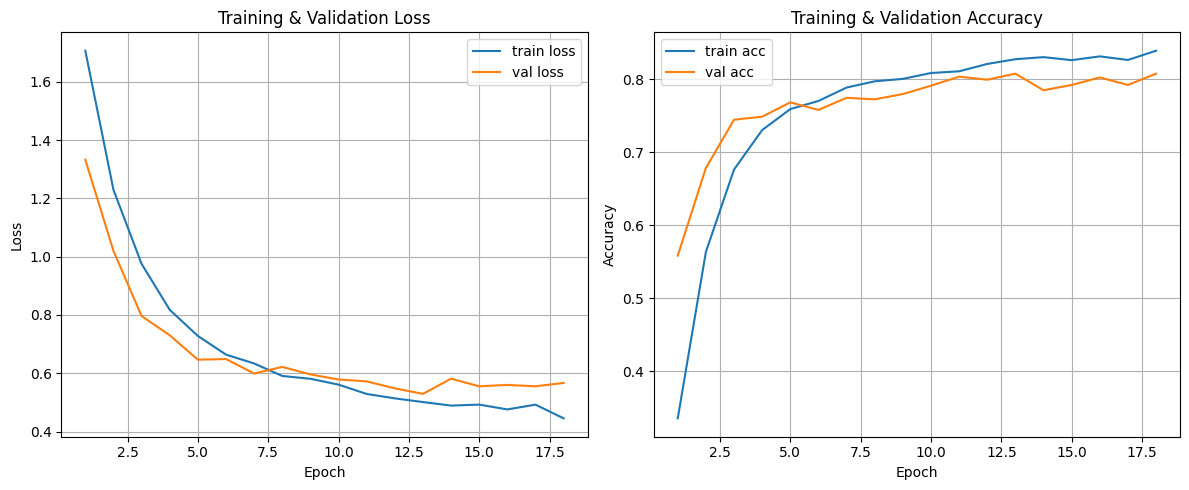

In [127]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final test loss: {test_loss:.4f}")
print(f"Final test accuracy: {test_acc:.4f}")

hist = history.history
epochs = range(1, len(hist['loss']) + 1)

train_loss    = hist['loss']
val_loss      = hist.get('val_loss')
train_acc     = hist.get('accuracy')
val_acc       = hist.get('val_accuracy')

plt.figure(figsize=(12, 5))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss,    label='train loss')
if val_loss: plt.plot(epochs, val_loss,  label='val loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
if train_acc: plt.plot(epochs, train_acc,   label='train acc')
if val_acc:   plt.plot(epochs, val_acc,     label='val acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [123]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test, y_pred, target_names=np.unique(data['label'])))

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step
              precision    recall  f1-score   support

       angry       0.78      0.83      0.80       170
     disgust       0.78      0.81      0.80       168
        fear       0.74      0.80      0.77       174
       happy       0.76      0.74      0.75       157
     neutral       0.76      0.93      0.84       199
         sad       0.89      0.70      0.78       166
    surprise       0.88      0.72      0.79       174

    accuracy                           0.79      1208
   macro avg       0.80      0.79      0.79      1208
weighted avg       0.80      0.79      0.79      1208



38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step


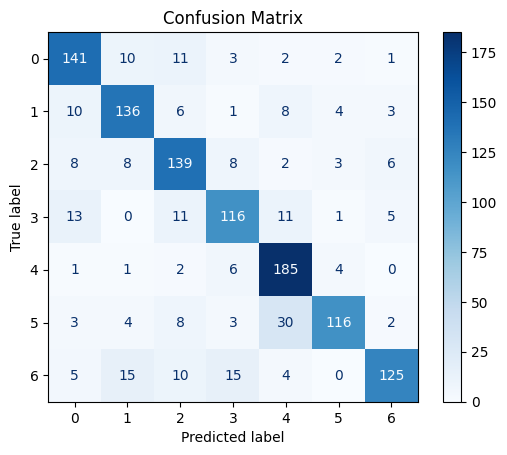

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict labels for the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # get class with highest probability

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# GRU

In [139]:
from tensorflow.keras.layers import GRU

model = Sequential([
    GRU(123, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


In [140]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final test loss: {test_loss:.4f}")
print(f"Final test accuracy: {test_acc:.4f}")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_1 (Masking)             │ (None, 388, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 123)            │        60,885 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,132 (277.86 KB)

 Trainable params: 71,132 (277.86 KB)

 Non-trainable params: 0 (0.00 B)

# CNN + LSTM

In [143]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    LSTM(64, return_sequences=False),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 386, 64)        │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 193, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 193, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,079 (168.28 KB)

 Trainable params: 43,079 (168.28 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32
)

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.1724 - loss: 1.9446 - val_accuracy: 0.1514 - val_loss: 1.9483
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.1688 - loss: 1.9453 - val_accuracy: 0.1514 - val_loss: 1.9492
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.1583 - loss: 1.9452 - val_accuracy: 0.1514 - val_loss: 1.9494
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.1641 - loss: 1.9435 - val_accuracy: 0.1514 - val_loss: 1.9493
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.1744 - loss: 1.9435 - val_accuracy: 0.1514 - val_loss: 1.9482
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.1669 - loss: 1.9441 - val_accuracy: 0.1514 - val_loss: 1.9493
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.1564 - loss: 1.9458 - val_accuracy: 0.1514 - val_loss: 1.9497
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.1595 - loss: 1.9445 - val_accu

# CNN using log-based-mel-spectograms

In [146]:
# 1) Parameters
SR       = 22050
N_MELS   = 128     # rows in the spectrogram
HOP_LEN  = 512
WIN_LEN  = 1024
MAX_FRAMES =  1 + int(np.floor((SR*4 - WIN_LEN) / HOP_LEN))
# (if you want exactly 4 s clips; adjust as needed)

# 2) Function to extract log-Mel spectrogram
def extract_logmel(path, sr=SR, n_mels=N_MELS, hop_length=HOP_LEN, win_length=WIN_LEN):
    y, _ = librosa.load(path, sr=sr, duration=4.0)  # pad/truncate to 4 s
    melspec = librosa.feature.melspectrogram(
        y=y, sr=sr, n_mels=n_mels,
        hop_length=hop_length, win_length=win_length
    )
    logmelspec = librosa.power_to_db(melspec, ref=np.max)
    # pad or trim to (n_mels, MAX_FRAMES)
    if logmelspec.shape[1] < MAX_FRAMES:
        pad = MAX_FRAMES - logmelspec.shape[1]
        logmelspec = np.pad(logmelspec, ((0,0),(0,pad)), mode='constant')
    else:
        logmelspec = logmelspec[:, :MAX_FRAMES]
    return logmelspec

# 3) Build your dataset
X = np.array([extract_logmel(p) for p in data['path']], dtype=np.float32)
# Add channel dimension for CNN: (N, n_mels, frames, 1)
X = X[..., np.newaxis]

# 4) Encode labels
le = LabelEncoder()
y_int = le.fit_transform(data['label'])
y_cat = to_categorical(y_int, num_classes=len(le.classes_))

# 5) Train/val/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y_cat, test_size=0.2, stratify=y_int, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2,
    stratify=np.argmax(y_trainval,axis=1), random_state=42
)

# 6) Build a simple 2-D CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(N_MELS, MAX_FRAMES, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

# 7) Train with validation
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30, batch_size=32
)

# 8) Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.3f}")


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 169, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 169, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 84, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 63, 84, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 82, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 82, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 78720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │    10,076,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,096,391 (38.51 MB)

 Trainable params: 10,096,199 (38.51 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.2924 - loss: 10.3451 - val_accuracy: 0.3723 - val_loss: 1.6115
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.4728 - loss: 1.3258 - val_accuracy: 0.5760 - val_loss: 3.2876
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.5255 - loss: 1.1078 - val_accuracy: 0.6453 - val_loss: 1.9597
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.5519 - loss: 1.0331 - val_accuracy: 0.6422 - val_loss: 4.1036
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.6066 - loss: 0.9618 - val_accuracy: 0.6774 - val_loss: 0.9537
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.6107 - loss: 0.9159 - val_accuracy: 0.7187 - val_loss: 1.3219
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.6449 - loss: 0.8433 - val_accuracy: 0.7084 - val_loss: 1.5968
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.6316 - loss: 0.8899 - val_acc